- Table 1 of descriptive statistics outlining the characteristics of our sample (e.g., year of training, age, gender, race, prior education)
- Mean scores of PPOS and PPOS-subscales of the sample
- PPOS and subscale comparison by year of training
- PPOS and subscale comparison by gender (M/F); prior education (CEGEP, Bachelors, Graduate) , intended specialization (primary vs. nonprimary care and surgical vs. nonsurgical)
- The PPOS is the quantitative scale we used to measure humanism and I tried to organize all of the quantitative data for you in this excel sheet by page.

If there are any other statistical analyses you think might be helpful please let me know too! 

## Mean Scores of PPOS and Subscales
This section summarizes the mean scores of the PPOS scale and its subscales (PPOS-S, PPOS-C) for the entire sample, and compares them by year of training (M1, M2, etc.).

In [29]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import re
sns.set_theme()

In [16]:
df = pd.read_excel('MSHumanism_CleanQuantData_250625_AC.xlsx', sheet_name='Full Data')


In [17]:
# Remap columns to more workable names
column_rename = {
    'Record ID': 'record_id',
    'Timepoint': 'timepoint',
    'PPOS': 'ppos',
    'PPOS-S': 'ppos_s',
    'PPOS-C': 'ppos_c',
    'Age:': 'age',
    'Gender Identity': 'gender',
    'Other: Specify': 'gender_other',
    'How proficient are you in French?': 'french_proficiency',
    'How proficient are you in English?': 'english_proficiency',
    'Do you speak any other languages? Please specify your proficiency (Fluent, Moderate, Basic). Please answer in format: [Language, Proficiency] for all languages.    ': 'other_languages',
    'Please specify if other level of training': 'other_training',
    'Please list all previous education you have completed (e.g., CEGEP, BSc, MSc, PHD, other professional certification). Please answer in format [degree, year of completion]': 'prior_education',
    'Site of study': 'site_of_study',
    'Do you have an intended specialization (including Family Medicine)?': 'intended_specialization',
    'What is your intended specialization?': 'specialty',
    'Other (Please specify):': 'race_other',
    # Cultural identity columns
    'Which Cultural Identities do you identify as? (Select that apply)   (choice=Black/African Canadian)': 'cultural_black',
    'Which Cultural Identities do you identify as? (Select that apply)   (choice=East Asian (e.g., Chinese, Japanese, Korean))': 'cultural_east_asian',
    'Which Cultural Identities do you identify as? (Select that apply)   (choice=Indigenous (First Nations, Métis, Inuit))': 'cultural_indigenous',
    'Which Cultural Identities do you identify as? (Select that apply)   (choice=Middle Eastern/North African (e.g., Arab, Persian))': 'cultural_middle_eastern',
    'Which Cultural Identities do you identify as? (Select that apply)   (choice=Latin American (e.g., Mexican, Brazilian, Coloumbian))': 'cultural_latin_american',
    'Which Cultural Identities do you identify as? (Select that apply)   (choice=South Asian (e.g., Indian, Bangladeshi, Sri Lankan))': 'cultural_south_asian',
    'Which Cultural Identities do you identify as? (Select that apply)   (choice=South East Asian (e.g. Filipino, Vietnamese, Thai))': 'cultural_southeast_asian',
    'Which Cultural Identities do you identify as? (Select that apply)   (choice=White/Caucasian)': 'cultural_white',
    'Which Cultural Identities do you identify as? (Select that apply)   (choice=Other (please specify))': 'cultural_other',
}
# Remove unnamed columns and apply renaming
df = df.loc[:, ~df.columns.str.strip().str.contains('^Unnamed')].rename(columns=column_rename)
df.columns

Index(['record_id', 'timepoint', 'ppos', 'ppos_s', 'ppos_c', 'age', 'gender',
       'gender_other', 'cultural_black', 'cultural_east_asian',
       'cultural_indigenous', 'cultural_middle_eastern',
       'cultural_latin_american', 'cultural_south_asian',
       'cultural_southeast_asian', 'cultural_white', 'cultural_other',
       'race_other', 'french_proficiency', 'english_proficiency',
       'other_languages', 'other_training', 'prior_education', 'site_of_study',
       'intended_specialization', 'specialty'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   record_id                 138 non-null    int64  
 1   timepoint                 138 non-null    object 
 2   ppos                      138 non-null    int64  
 3   ppos_s                    138 non-null    int64  
 4   ppos_c                    138 non-null    int64  
 5   age                       138 non-null    int64  
 6   gender                    138 non-null    object 
 7   gender_other              0 non-null      float64
 8   cultural_black            138 non-null    object 
 9   cultural_east_asian       138 non-null    object 
 10  cultural_indigenous       138 non-null    object 
 11  cultural_middle_eastern   138 non-null    object 
 12  cultural_latin_american   138 non-null    object 
 13  cultural_south_asian      138 non-null    object 
 14  cultural_s

In [19]:
characteristics = ['timepoint', 'age', 'gender']
for col in characteristics:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print()

Unique values in 'timepoint':
['M2 (TCP)' 'M4' 'M3' 'M1' 'M2PhD' 'M2' 'M2 (TCP)MdPHD' 'm3']

Unique values in 'age':
[21 42 30 25 27 18 33 29 23 22 24 26 37 32 28 19 20 35 43 39 31]

Unique values in 'gender':
['Female' 'Male']



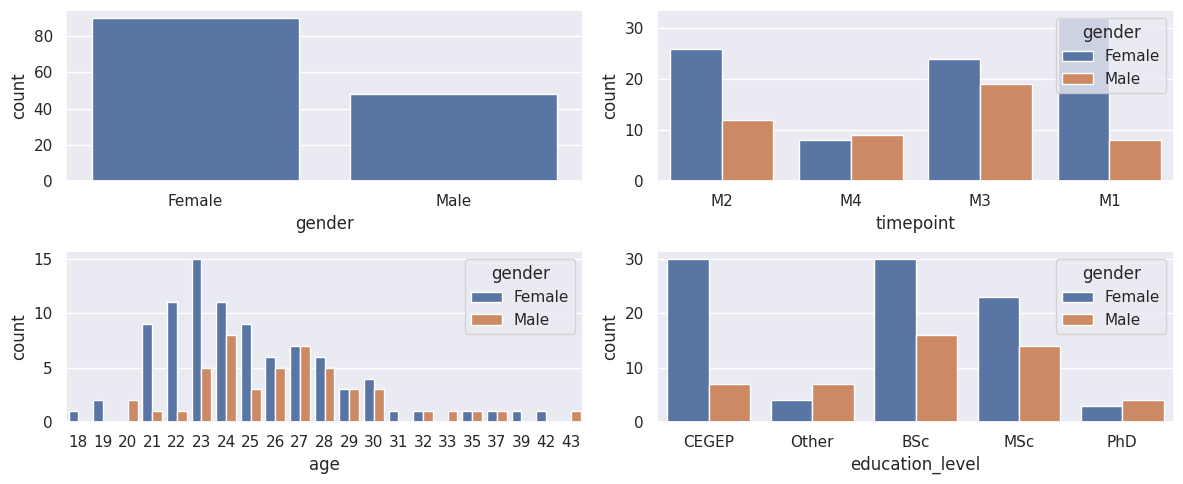

In [ ]:
def get_education(row):
	if row['has_phd']:
		return 'PhD'
	elif row['has_msc']:
		return 'MSc'
	elif row['has_bsc']:
		return 'BSc'
	elif row['has_cegep']:
		return 'CEGEP'
	else:
		return 'Other'

df['education_level'] = df.apply(get_education, axis=1)

fig, axs = plt.subplots(2, 2, figsize=(12, 5))
sns.countplot(data=df, x='gender', ax=axs[0,0])
sns.countplot(data=df, x='timepoint', hue='gender', ax=axs[0,1])
sns.countplot(data=df, x='age', hue='gender', ax=axs[1,0])
sns.countplot(data=df, x='education_level', hue='gender', ax=axs[1,1])
plt.tight_layout()
plt.show()

Mean scores for the sample:
ppos      50.615942
ppos_s    27.963768
ppos_c    22.652174
dtype: float64

Mean scores by year of training:
                ppos     ppos_s     ppos_c
timepoint                                 
M1         50.050000  28.100000  21.950000
M2         50.368421  27.973684  22.394737
M3         52.302326  28.139535  24.162791
M4         48.235294  27.176471  21.058824


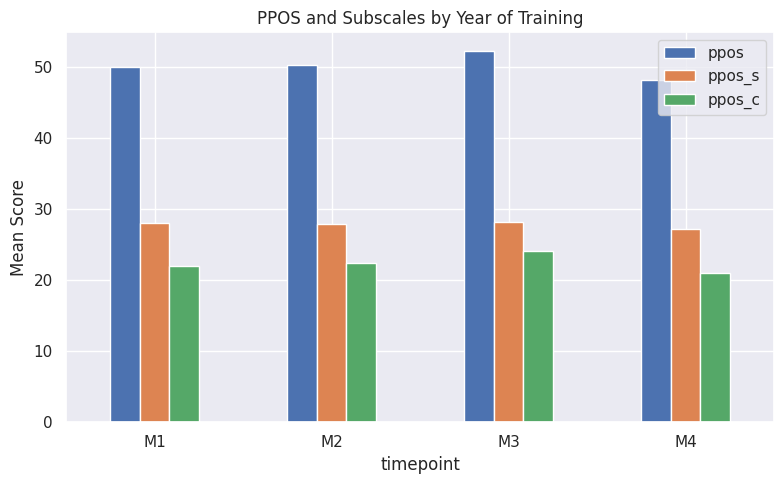

In [39]:
# Mean scores for PPOS and subscales (overall)
ppos_means = df[['ppos', 'ppos_s', 'ppos_c']].mean()
print('Mean scores for the sample:')
print(ppos_means)

# Mean scores by year of training
means_by_year = df.groupby('timepoint')[['ppos', 'ppos_s', 'ppos_c']].mean()
print('\nMean scores by year of training:')
print(means_by_year)

# Plot comparison by year of training
means_by_year.plot(kind='bar', figsize=(8,5))
plt.ylabel('Mean Score')
plt.title('PPOS and Subscales by Year of Training')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Mean PPOS and subscales by gender:
             ppos     ppos_s     ppos_c
gender                                 
Female  50.088889  27.822222  22.266667
Male    51.604167  28.229167  23.375000


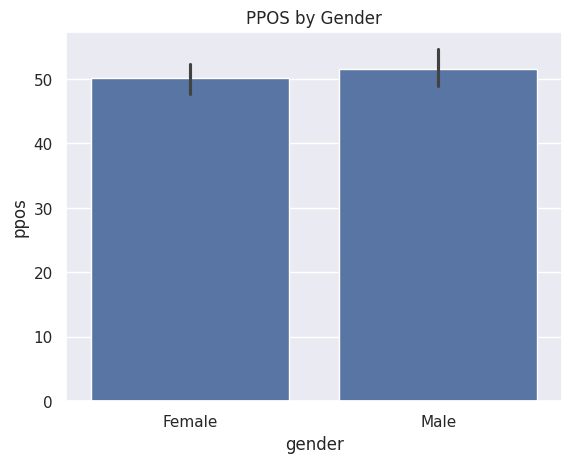

Mean PPOS and subscales by education level:
                      ppos     ppos_s     ppos_c
education_level                                 
BSc              51.130435  28.456522  22.673913
CEGEP            51.702703  28.081081  23.621622
MSc              48.675676  27.432432  21.243243
Other            53.272727  27.909091  25.363636
PhD              47.571429  27.000000  20.571429


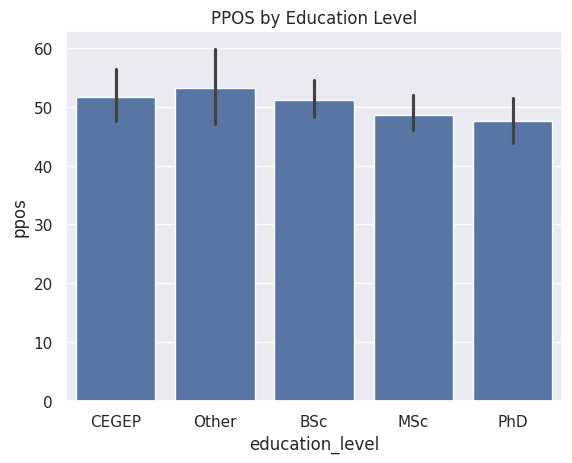

Mean PPOS and subscales by primary care intent:
                   ppos     ppos_s     ppos_c
primary_care                                 
False         50.615942  27.963768  22.652174


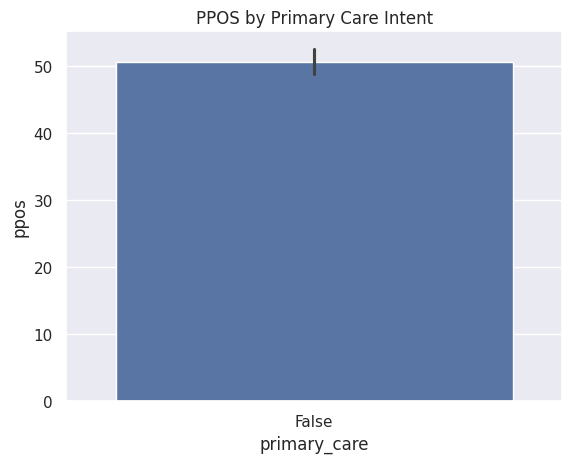

Mean PPOS and subscales by surgical intent:
               ppos     ppos_s     ppos_c
surgical                                 
False     50.662651  28.168675  22.493976
True      48.818182  26.545455  22.272727


TypeError: '<' not supported between instances of 'NoneType' and 'bool'

In [40]:
# --- Comparison by Gender ---
print('Mean PPOS and subscales by gender:')
print(df.groupby('gender')[['ppos', 'ppos_s', 'ppos_c']].mean())
sns.barplot(data=df, x='gender', y='ppos')
plt.title('PPOS by Gender')
plt.show()

# --- Comparison by Prior Education ---
print('Mean PPOS and subscales by education level:')
print(df.groupby('education_level')[['ppos', 'ppos_s', 'ppos_c']].mean())
sns.barplot(data=df, x='education_level', y='ppos')
plt.title('PPOS by Education Level')
plt.show()

# --- Intended Specialization: Primary vs. Nonprimary Care ---
# You may need to adjust the mapping below to match your data
def is_primary_care(s):
    if pd.isnull(s): return None
    s = str(s).lower()
    return 'family' in s or 'primary' in s
df['primary_care'] = df['intended_specialization'].apply(is_primary_care)

print('Mean PPOS and subscales by primary care intent:')
print(df.groupby('primary_care')[['ppos', 'ppos_s', 'ppos_c']].mean())
sns.barplot(data=df, x='primary_care', y='ppos')
plt.title('PPOS by Primary Care Intent')
plt.show()

# --- Intended Specialization: Surgical vs. Nonsurgical ---
# You may need to adjust the mapping below to match your data
def is_surgical(s):
    if pd.isnull(s): return None
    s = str(s).lower()
    return any(word in s for word in ['surg', 'orthop', 'neuro', 'urology', 'cardiac', 'plastic'])
df['surgical'] = df['specialty'].apply(is_surgical)

print('Mean PPOS and subscales by surgical intent:')
print(df.groupby('surgical')[['ppos', 'ppos_s', 'ppos_c']].mean())
sns.barplot(data=df, x='surgical', y='ppos')
plt.title('PPOS by Surgical Intent')
plt.show()

## PPOS and Subscale Comparison by Gender, Prior Education, and Intended Specialization
This section compares PPOS and its subscales by gender (M/F), prior education (CEGEP, Bachelors, Graduate), and intended specialization (primary vs. nonprimary care, surgical vs. nonsurgical).

In [22]:
# Create boolean columns for each education type
df['has_cegep'] = df['prior_education'].str.lower().str.contains('cegep|dec', na=False)
df['has_bsc'] = df['prior_education'].str.lower().str.contains('bsc|b.sc|bachelors|bachelor|bhsc|bkin|h.bsc', na=False)
df['has_msc'] = df['prior_education'].str.lower().str.contains('msc|m.sc', na=False)
df['has_phd'] = df['prior_education'].str.lower().str.contains('phd', na=False)
df[['prior_education', 'has_cegep', 'has_bsc', 'has_msc', 'has_phd']]

,prior_education,has_cegep,has_bsc,has_msc,has_phd
0,"CEGEP, 2022",True,False,False,False
1,Graduate studies in Experimental Medicine,False,False,False,False
2,"Bsc, jd, llm",False,True,False,False
3,"CEGEP, Bsc, Msc",True,True,True,False
4,BSc Human Kinetics 2020 BSc Translational and...,False,True,False,False
...,...,...,...,...,...
133,Bsc Msc,False,True,True,False
134,"cegep, 2013 bsc, 2015 MSc, 2017 md 2025",True,True,True,False
135,"cegep in health sciences, 2016 1 year in cine...",True,True,False,False
136,"BSc, MSc studies,",False,True,True,False


In [23]:
# Clean up 'timepoint' to only show M1, M2, etc.
def clean_timepoint(val):
    if pd.isnull(val):
        return val
    val = str(val).strip().upper()
    # Extract M1, M2, etc. if present
    match = re.search(r'M\d+', val)
    if match:
        return match.group(0)
    return val

df['timepoint'] = df['timepoint'].apply(clean_timepoint)
df['timepoint'].value_counts()

timepoint
M3    43
M1    40
M2    38
M4    17
Name: count, dtype: int64

In [24]:
def checked(row):
    return row == 'Checked'

# Apply the checked function to all relevant columns
for col in df.columns:
    if col.startswith('which_cultural_identities_do_you_identify_as?_(select_that_apply)'):
        df[col] = df[col].apply(checked)
df


,record_id,timepoint,ppos,ppos_s,ppos_c,age,gender,gender_other,cultural_black,cultural_east_asian,...,other_languages,other_training,prior_education,site_of_study,intended_specialization,specialty,has_cegep,has_bsc,has_msc,has_phd
0,1,M2,88,40,48,21,Female,NaN,Unchecked,Unchecked,...,"Spanish (moderate), Arab (moderate)",NaN,"CEGEP, 2022",Montreal,Yes,Internal medicine,True,False,False,False
1,2,M4,75,29,46,42,Female,NaN,Unchecked,Unchecked,...,"Hindi, Punjabi, Urdu",NaN,Graduate studies in Experimental Medicine,Montreal,No,NaN,False,False,False,False
2,3,M3,76,38,38,30,Male,NaN,Unchecked,Unchecked,...,"Arabic, proficient",NaN,"Bsc, jd, llm",Montreal,Yes,Dermatology,False,True,False,False
3,5,M2,76,42,34,25,Male,NaN,Unchecked,Unchecked,...,none,NaN,"CEGEP, Bsc, Msc",Montreal,Yes,internal medicine - maybe medical oncology,True,True,True,False
4,7,M3,61,33,28,27,Male,NaN,Checked,Unchecked,...,Basic Japanese,NaN,BSc Human Kinetics 2020 BSc Translational and...,Montreal,Yes,Anesthesia,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,207,M3,41,20,21,28,Female,NaN,Checked,Unchecked,...,"Arabic, fluent",NaN,Bsc Msc,Montreal,No,NaN,False,True,True,False
134,208,M4,41,28,13,31,Female,NaN,Unchecked,Unchecked,...,"tamil, moderate",NaN,"cegep, 2013 bsc, 2015 MSc, 2017 md 2025",Montreal,Yes,family medicine,True,True,True,False
135,210,M4,56,28,28,28,Female,NaN,Unchecked,Unchecked,...,basic spanish,NaN,"cegep in health sciences, 2016 1 year in cine...",Montreal,Yes,I am starting residency in family medicine,True,True,False,False
136,212,M3,50,36,14,27,Male,NaN,Unchecked,Unchecked,...,Arabic moderate Spanish basic,NaN,"BSc, MSc studies,",Montreal,Yes,Family Medicine + 1 Emergency Medicine,False,True,True,False


In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   record_id                 138 non-null    int64  
 1   timepoint                 138 non-null    object 
 2   ppos                      138 non-null    int64  
 3   ppos_s                    138 non-null    int64  
 4   ppos_c                    138 non-null    int64  
 5   age                       138 non-null    int64  
 6   gender                    138 non-null    object 
 7   gender_other              0 non-null      float64
 8   cultural_black            138 non-null    object 
 9   cultural_east_asian       138 non-null    object 
 10  cultural_indigenous       138 non-null    object 
 11  cultural_middle_eastern   138 non-null    object 
 12  cultural_latin_american   138 non-null    object 
 13  cultural_south_asian      138 non-null    object 
 14  cultural_s